## Steps
1. Understand the Problem and the Data
2. Import and Inspect the Data
3. Handling Missing Values
4. Explore Data Characteristics
5. Perform Data Transformation
6. Visualize Data Relationships
7. Handling Outliers
8. Communicate Findings and Insights


In [2]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.width", 1000)

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")


df = pd.read_csv(path + "/heart_disease_uci.csv")
print(df.head(100))

# Display basic statistics
print(df.describe())


     id  age     sex    dataset               cp  trestbps   chol    fbs         restecg  thalch  exang  oldpeak        slope   ca               thal  num
0     1   63    Male  Cleveland   typical angina     145.0  233.0   True  lv hypertrophy   150.0  False      2.3  downsloping  0.0       fixed defect    0
1     2   67    Male  Cleveland     asymptomatic     160.0  286.0  False  lv hypertrophy   108.0   True      1.5         flat  3.0             normal    2
2     3   67    Male  Cleveland     asymptomatic     120.0  229.0  False  lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect    1
3     4   37    Male  Cleveland      non-anginal     130.0  250.0  False          normal   187.0  False      3.5  downsloping  0.0             normal    0
4     5   41  Female  Cleveland  atypical angina     130.0  204.0  False  lv hypertrophy   172.0  False      1.4    upsloping  0.0             normal    0
..  ...  ...     ...        ...              ...       ...    ...    .

In [3]:

# Display information about the dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [4]:

# Check for missing values
print(df.isnull().sum())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


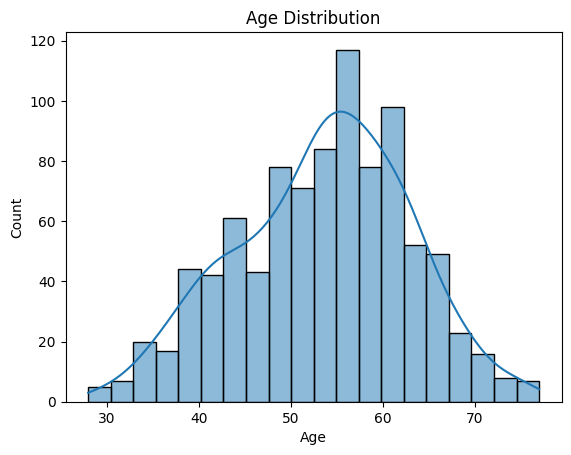

In [5]:

# Visualize the distribution of age
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

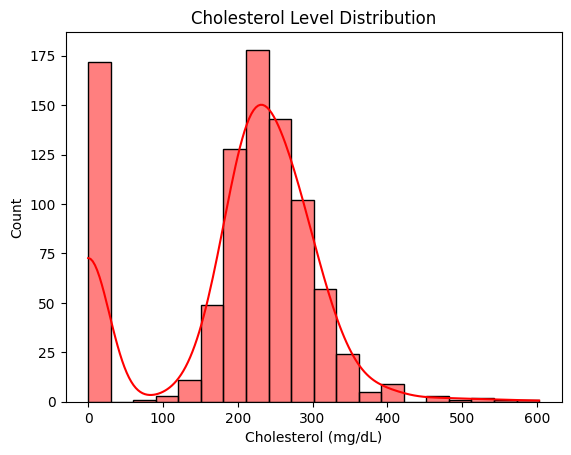

In [6]:

# Visualize the distribution of Cholesterol Distribution
sns.histplot(df['chol'], bins=20, kde=True, color="red")
plt.title("Cholesterol Level Distribution")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Count")
plt.show()


There are some extremely high cholesterol levels and some with 0 levels, indicating potential data entry errors or missing values.


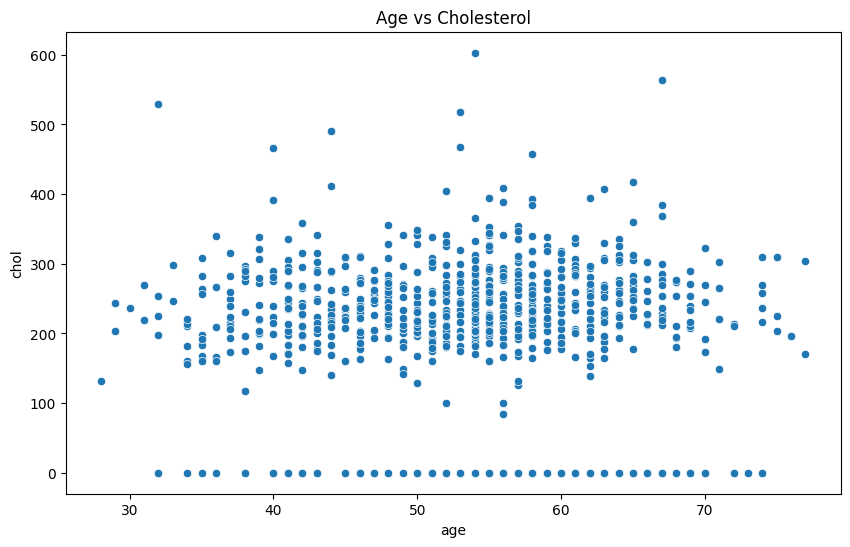

In [7]:

# Visualize the relationship between age and cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=df)
plt.title("Age vs Cholesterol")
plt.show()


Resting Blood Pressure Distribution

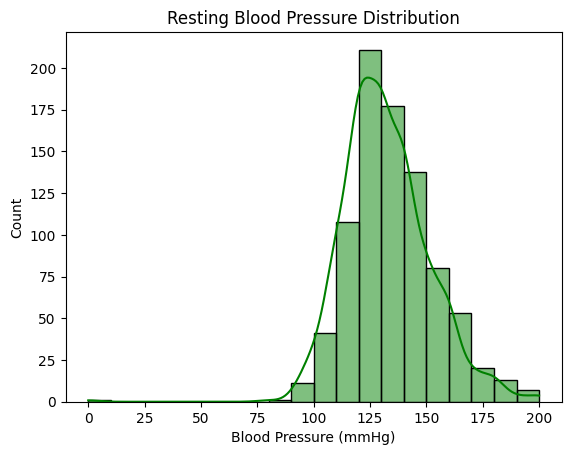

In [8]:
sns.histplot(df['trestbps'], bins=20, kde=True, color="green")
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.show()

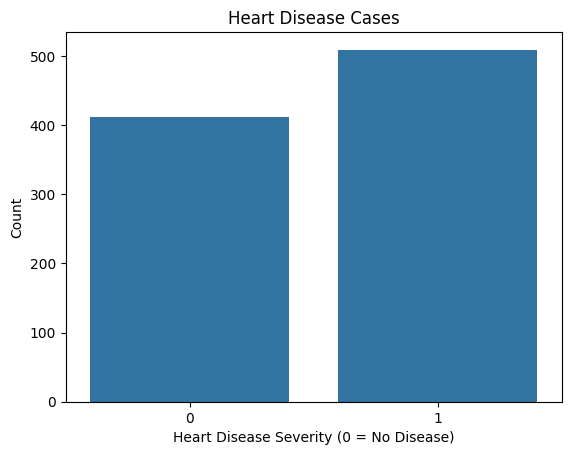

In [9]:
# Countplot for the 'num' variable
df["heart_disease"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
sns.countplot(x="heart_disease", data=df)
plt.title("Heart Disease Cases")
plt.xlabel("Heart Disease Severity (0 = No Disease)")
plt.ylabel("Count")
plt.show()

## Identifying Trends and Patterns
* Does age impact heart disease risk?
* Are older people more likely to have heart disease?
* How do cholesterol levels vary between patients with and without heart disease?
* Are men or women more affected by heart disease in this dataset?
* How does resting blood pressure (trestbps) compare in heart disease vs. no heart disease?
* Do certain chest pain types (cp) correlate more with heart disease?
* Is there a strong correlation between features like cholesterol, blood pressure, and heart disease?

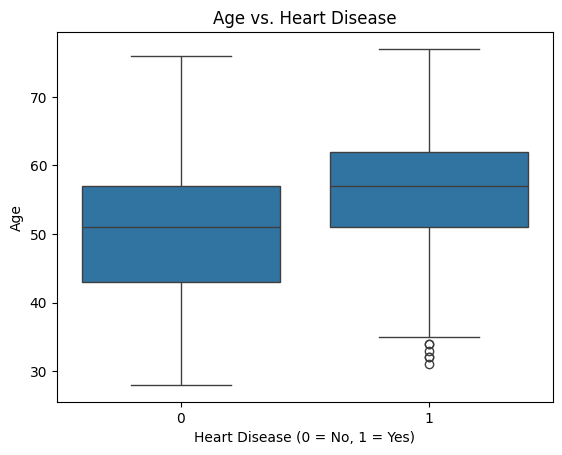

In [10]:
# 1. Does age impact heart disease risk?
sns.boxplot(x="heart_disease", y="age", data=df)
plt.title("Age vs. Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

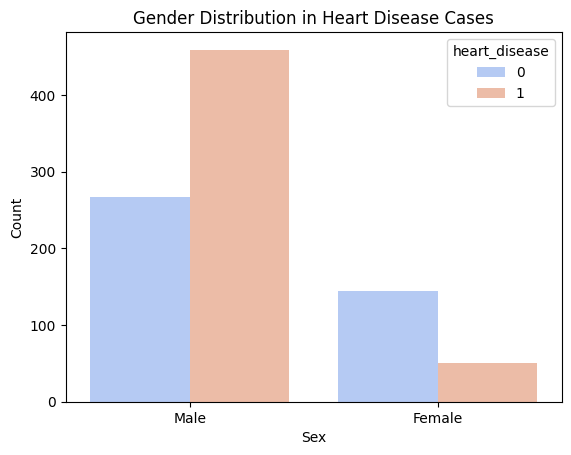

In [11]:
sns.countplot(x="sex", hue="heart_disease", data=df, palette="coolwarm")
plt.title("Gender Distribution in Heart Disease Cases")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()